In [1]:
import numpy as np 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt 


In [2]:
class LinearRegression: 
    def __init__(self, lr: float = 0.01, n_iters: int = 1000) -> None: 
        self.lr = lr 
        self.n_iters = n_iters 
        self.weights = None 
        self.bias = None 
    
    def fit(self, X: np.ndarray, y: np.ndarray): 
        num_samples, num_features = X.shape 
        self.weights = np.random.randn(num_features) 
        self.bias = 0 

        for i in range(self.n_iters): 
            y_pred = np.dot(X, self.weights) + self.bias 
            diff = y_pred - y 
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y) 
            db = (1 / num_samples) * np.sum(y_pred - y) 

            self.weights = self.weights - self.lr * dw 
            self.bais = self.bias - self.lr * db 
        
        return self 
    
    def predict(self, X): 
        return np.dot(X, self.weights) + self.bias 

In [3]:
X, y = datasets.make_regression(n_samples=500, n_features=1, noise=15, random_state=4) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

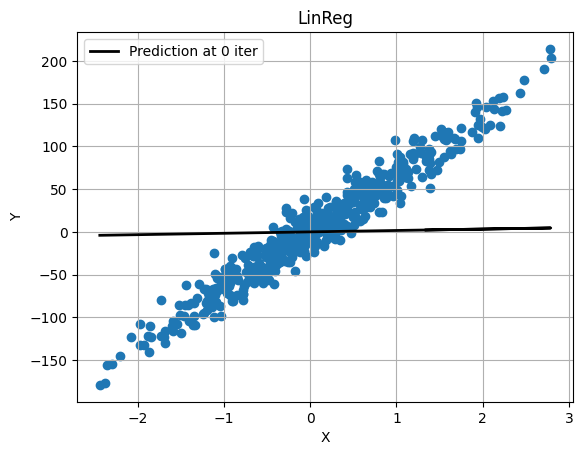

In [4]:

plt.grid() 
plt.title('LinReg') 
plt.xlabel('X') 
plt.ylabel('Y')
plt.scatter(X, y) 
plt.plot(X, LinearRegression(n_iters=0).fit(X_train, y_train).predict(X), linewidth=2, color='black', label='Prediction at 0 iter') 
plt.legend() 
plt.show()

In [5]:
model = LinearRegression(lr=0.1, n_iters=1000) 

In [6]:
model.fit(X_train, y_train) 
predictions = model.predict(X_test) 


In [7]:
# Mean Squared Error 
def mse(y_true: np.ndarray, y_pred: np.ndarray):
    error = np.mean((y_true - y_pred) ** 2) 
    return error  


In [8]:

pred_mse = mean_squared_error(y_test, predictions) 
print(pred_mse)

233.00854477605887


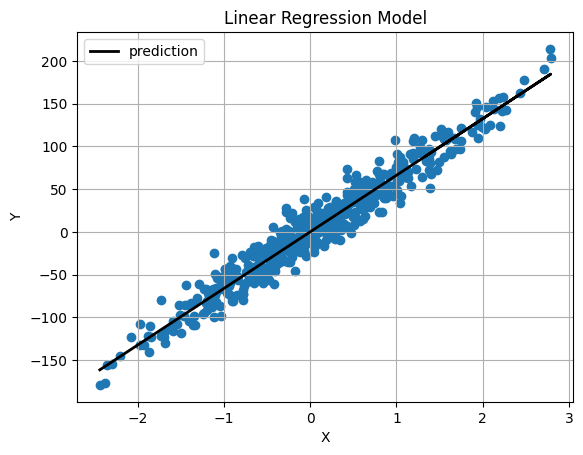

In [9]:
plt.grid()
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(X, y)
plt.plot(X, model.predict(X), linewidth=2,
            color='black', label='prediction')
plt.legend()
# plt.grid()
plt.show()